In [25]:
%matplotlib inline

In [26]:
from pymatgen.io.cif import CifParser
from pathlib import Path
import numpy as np
from pymatgen.core.periodic_table import DummySpecies, Element
from pymatgen.core.sites import PeriodicSite
from pymatgen.io.ase import AseAtomsAdaptor
from ase.visualize.plot import plot_atoms
from matplotlib import pyplot as plt

unit_cell = CifParser(Path(
            "..",
            "defects_generation",
            "molecules",
            "MoS2.cif")).get_structures(primitive=False)[0]
supercell_size = (8, 8, 1)
reference_supercell = unit_cell.copy()
reference_supercell.make_supercell(supercell_size)

/home/kna/.cache/pypoetry/virtualenvs/2d-defects-potential-learning-pYjw2mkT-py3.8/lib/python3.8/site-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


In [27]:
rng = np.random.RandomState(42)

In [28]:
len(reference_supercell)

192

In [29]:
substitutions = {
    Element("Mo"): Element("W"),
    Element("S"): Element("Se")
}

In [36]:
def generate_structure(defect_density, vacancy_fraction):
    """
    Takes reference_supercell and generates a structure with defect_density total defects, among which vacancy_fraction are vacancies.
    """
    supercell = reference_supercell.copy()
    defect_sites = rng.choice(len(supercell), size=int(len(supercell)*defect_density), replace=False)
    vacancy_sites = set(rng.choice(len(defect_sites), size=int(len(defect_sites)*vacancy_fraction), replace=False))
    for i in map(int, defect_sites):
        if i in vacancy_sites:
            supercell[i] = PeriodicSite( # vacancy
                species=DummySpecies(),
                coords=supercell[i].coords,
                coords_are_cartesian=True,
                lattice=supercell.lattice,
            )
        else:
            supercell[i] = PeriodicSite( # substitution
                species=substitutions[supercell[i].specie],
                coords=supercell[i].coords,
                coords_are_cartesian=True,
                lattice=supercell.lattice,
            )
    return supercell

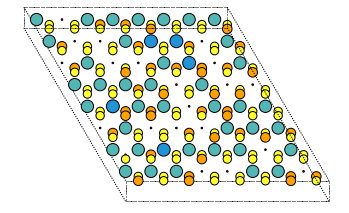

In [43]:
example_structure = generate_structure(0.35, 0.8)
ase_atoms = AseAtomsAdaptor.get_atoms(example_structure)
fig, ax = plt.subplots()
plot_atoms(ase_atoms, ax, radii=0.5, rotation=('10x, 0y, 0z'), show_unit_cell=True)
xlim = 40
ylim = 23
ax.set_xlim(-2, xlim)
ax.set_ylim(-2, ylim)
ax.set_axis_off();